Classifying Movie Reviews
===========

Import the IMDB dataset, labels are 1 positive 0 negative. Data is a list of word indices encoding the review.

In [16]:
%config IPCompleter.greedy=True #used to turn on intellisense
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Translate back to english as a test.

In [19]:
word_index = imdb.get_word_index() #maps words to index, we want the inverse
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 0-2 reserved for special chars
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

One hot encode the reviews. Seems odd to me, I would encode with frequency.

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now we define a simple network to solve the problem.

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #undefined batch_size allows any
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Finally we define our optimiser and loss function.

In [25]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy',])

We could also pass our optimiser as a class and our loss + metric as a function. This would let us define custom optimisers and losses.

In [26]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy,])

As the test data should be kept seperate from the train data until final evaluation, we will first want to create a validation set which can be used to check our accuracy during training.

In [28]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 epochs in mini_batches of 512, with validation running every epoch.

In [29]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 9s 621us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_binary_

The `history` returned here keeps track of everything that happened during training. We can use this to plot our loss adn accuracy during training.

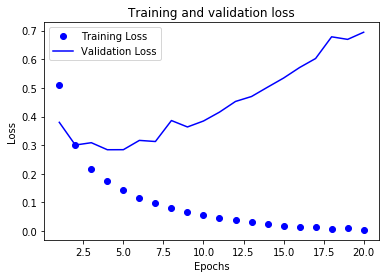

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['val_binary_accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

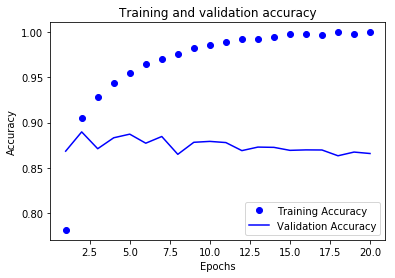

In [37]:
plt.clf() # Clears the plot
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(history_dict['val_binary_accuracy']) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

It should be fairly obvious that we are overfitting after a few epochs. Reduce the number of epochs so as to avoid this, we'll go through other techniques later.

In [41]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #undefined batch_size allows any
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=['acc',])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_val, y_val))
result = model.evaluate(x_test, y_test)
print(result)

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 115us/step - loss: 0.5013 - acc: 0.7923 - val_loss: 0.3706 - val_acc: 0.8694
Epoch 2/4
15000/15000 [==============================] - 1s 99us/step - loss: 0.2950 - acc: 0.8998 - val_loss: 0.3002 - val_acc: 0.8857
Epoch 3/4
15000/15000 [==============================] - 1s 100us/step - loss: 0.2150 - acc: 0.9301 - val_loss: 0.2818 - val_acc: 0.8881
Epoch 4/4
25000/25000 [==============================] - 1s 59us/step
[0.2988255714035034, 0.87816]


If we want to use the model to get new predictions we can use `model.predict`. This will give back probabilites that the review is positive.

In [42]:
print(model.predict(x_test))

[[0.2996337 ]
 [0.99954945]
 [0.98067   ]
 ...
 [0.11670266]
 [0.18814263]
 [0.54559165]]


My own test is to see if using frequencies improves things.

In [45]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for s in sequence:
            results[i, s] += 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [53]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,))) #undefined batch_size allows any
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.Adam(lr=0.0001),
             loss=losses.binary_crossentropy,
             metrics=['acc',])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))
result = model.evaluate(x_test, y_test)
print(result)

Train on 15000 samples, validate on 10000 samples
Epoch 1/9
15000/15000 [==============================] - 2s 140us/step - loss: 0.6590 - acc: 0.6462 - val_loss: 0.6117 - val_acc: 0.7415
Epoch 2/9
15000/15000 [==============================] - 1s 94us/step - loss: 0.5517 - acc: 0.7985 - val_loss: 0.5089 - val_acc: 0.8262
Epoch 3/9
15000/15000 [==============================] - 1s 94us/step - loss: 0.4414 - acc: 0.8657 - val_loss: 0.4179 - val_acc: 0.8583
Epoch 4/9
15000/15000 [==============================] - 1s 92us/step - loss: 0.3507 - acc: 0.8944 - val_loss: 0.3588 - val_acc: 0.8720
Epoch 5/9
15000/15000 [==============================] - 1s 94us/step - loss: 0.2873 - acc: 0.9135 - val_loss: 0.3233 - val_acc: 0.8814
Epoch 6/9
15000/15000 [==============================] - 1s 92us/step - loss: 0.2405 - acc: 0.9287 - val_loss: 0.3077 - val_acc: 0.8832
Epoch 7/9
15000/15000 [==============================] - 1s 94us/step - loss: 0.2050 - acc: 0.9404 - val_loss: 0.2937 - val_acc: 0.88

Not really even with some extra tweaks.